## porespy + phbin

(c)pearcandy

In [1]:
import porespy as ps
import matplotlib.pyplot as plt
import numpy as np
import phbin, cv2
import scipy
import scipy.stats as spst
from IPython.display import display, Image
import random
%matplotlib notebook

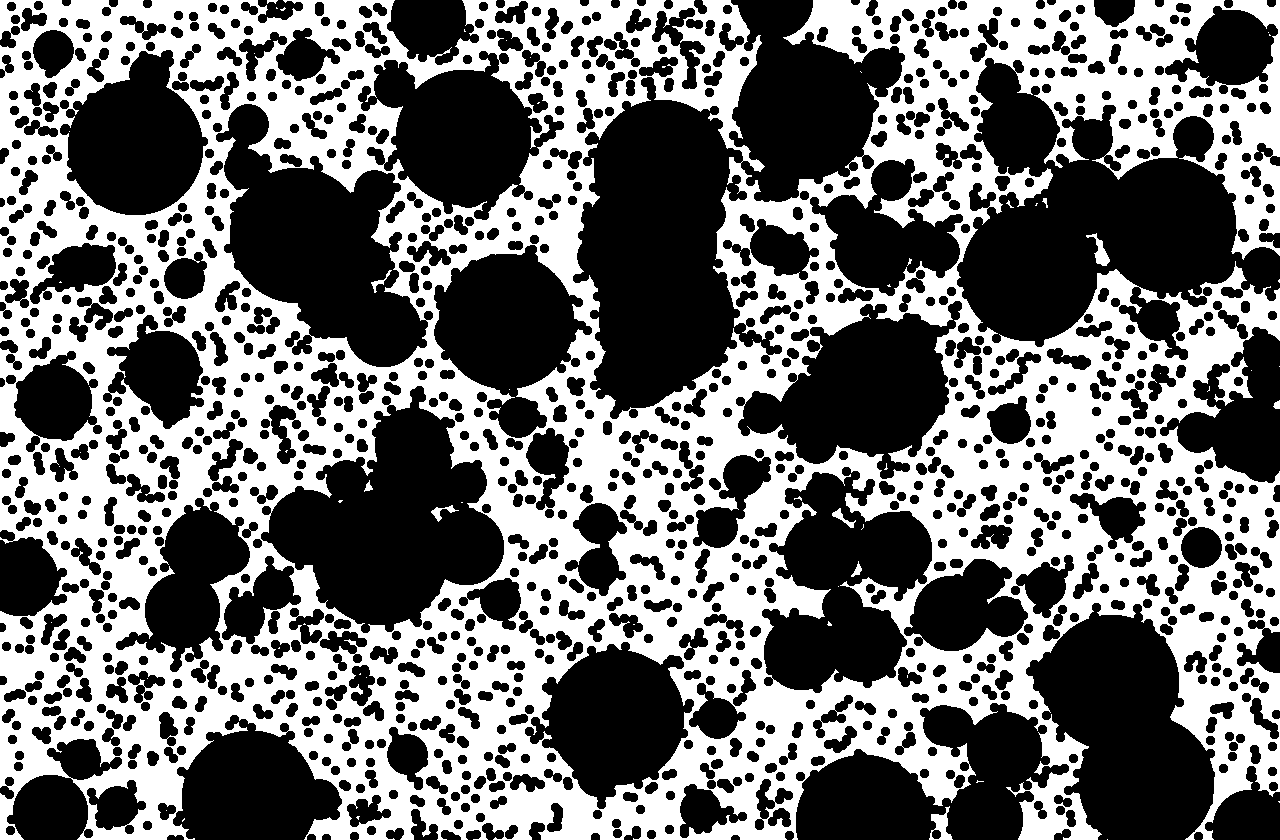

In [2]:
shape=[840,1280]
porosity = 0.5
#dist = spst.norm(loc=10, scale=5)
dist = spst.norm(loc=10,scale=40)
#im = ps.generators.polydisperse_spheres(shape=shape, porosity=porosity, dist=dist)


sem0 = ps.generators.polydisperse_spheres(shape,porosity,dist,nbins=4)

#noise_level=2.0
#noise=np.random.randint(0,noise_level,(840,1280))

sem0 = sem0 #+ noise

plt.imsave('./sem0.png',sem0,cmap='gray')
display(Image('./sem0.png'))

In [3]:
#packing model

#sem0=np.zeros([840,1280])
#sem0 = ps.generators.rsa(sem0,r=50, volume_fraction=0.2)
#sem0 = ps.generators.rsa(sem0,r=9, volume_fraction=0.4)
#sem0 = ps.generators.rsa(sem0,r=30, volume_fraction=0.4)
#sem0 = ps.generators.rsa(sem0,r=5, volume_fraction=0.7)

#noise_level=1.0
#noise=np.random.randint(0,noise_level,(840,1280))

#sem0 = np.invert(sem0+noise) #+ noise

#plt.imsave('./sem0.png',sem0,cmap='gray')
#display(Image('./sem0.png'))

In [4]:
#sem_inv = np.invert(sem0)
#sem_inv

<IPython.core.display.Javascript object>


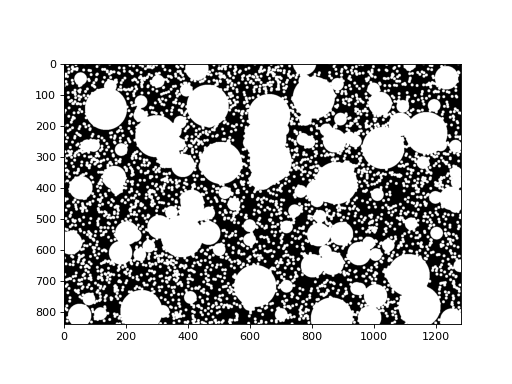

In [5]:
img, sem_bin = phbin.make_input_imgobj('./sem0.png',th=150)
plt.close()
plt.imshow(sem_bin,cmap='gray')

## persistent homology

In [6]:
pds = phbin.make_pd([sem_bin],mode='sublevel',dim=0)

100%|██████████| 1/1 [00:01<00:00,  1.74s/it]


<IPython.core.display.Javascript object>


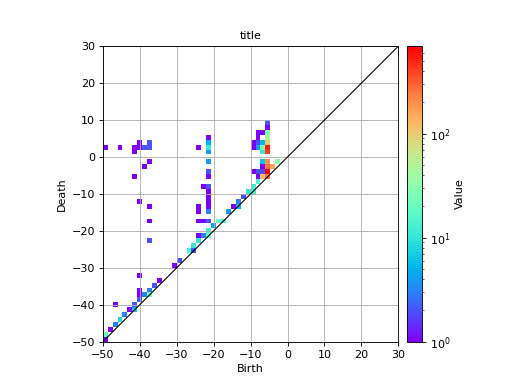

In [7]:
plt.close()
#phbin.draw_pd(pds[0])
phbin.draw_pd(pds[0],x_range=[-50,30],x_bins=60)

<IPython.core.display.Javascript object>


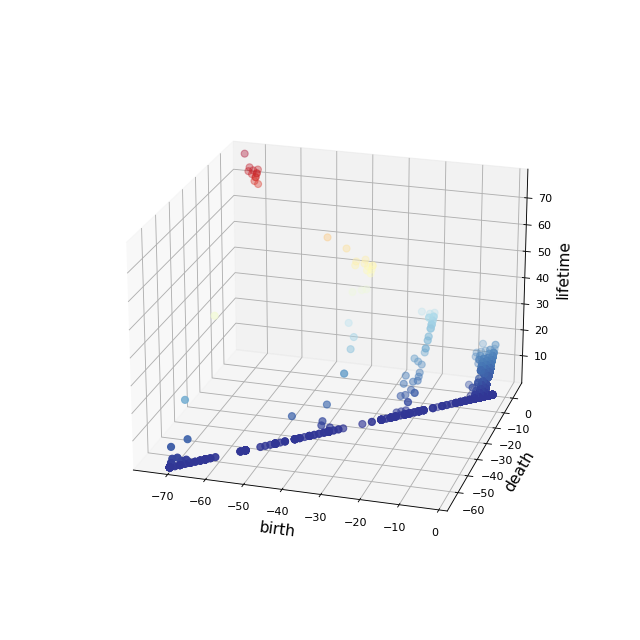

In [14]:
phbin.draw_pd_lifetime(pds[0])

In [9]:
pimage = phbin.make_pi(pds,mesh_range=(-30,10),bins=35,sigma=1.0,weight=('atan',0.0001,15),superlevel=False)

100%|██████████| 1/1 [00:00<00:00, 333.62it/s]


In [10]:
pi = np.array(pimage['pi'][0])
mesh = pimage['mesh']

In [11]:
plt.close()
plt.plot(pi)

<IPython.core.display.Javascript object>


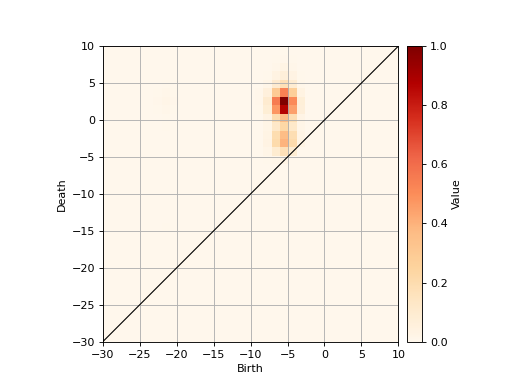

In [12]:
phbin.draw_pi(pi,mesh)

## Reverse Map

In [13]:
phtrees = phbin.make_phtrees([sem_bin],mode='sublevel',dim=0)

100%|██████████| 1/1 [00:30<00:00, 30.05s/it]


In [39]:
area = mesh.mask_from_vector(pi>0.2)

<IPython.core.display.Javascript object>


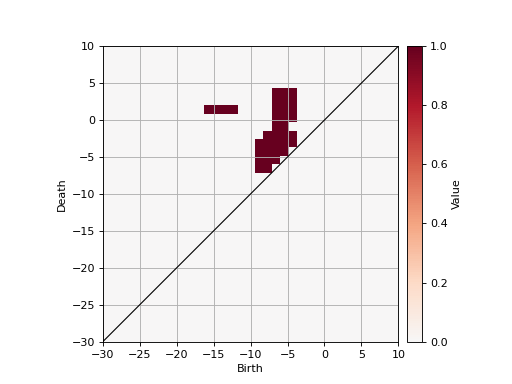

In [40]:
area.plot(colorbar={"type":"linear-midpoint","midpoint":0.0})

In [41]:
nodes = phbin.pd_filter(pds[0],phtrees[0],area)

In [42]:
phbin.reverse_map(nodes,img)

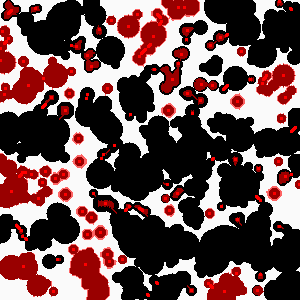

In [43]:
display(Image('./reverse.png'))

## Reverse Map2

In [15]:
nodes = phbin.pd_liftime_filter(pds[0],phtrees[0],th=60)

In [16]:
phbin.reverse_map(nodes,img)

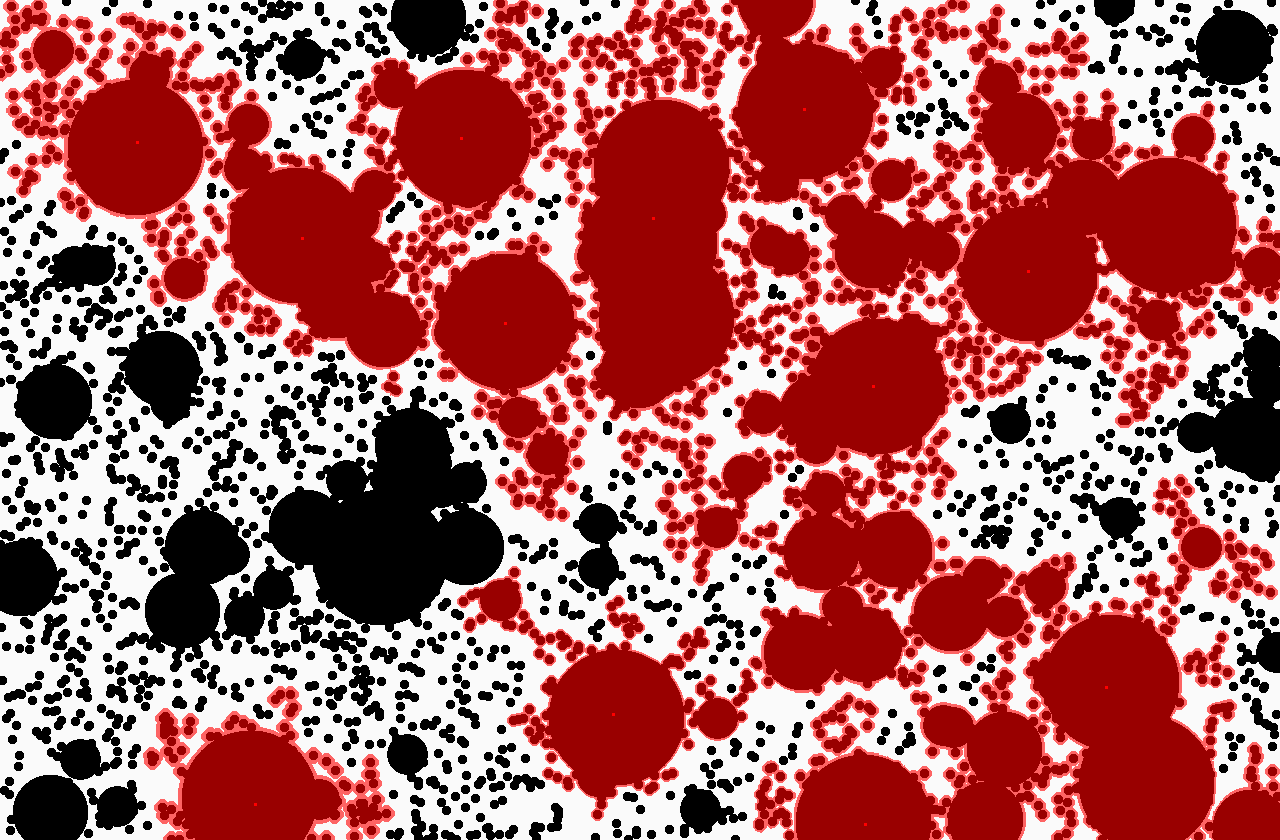

In [17]:
display(Image('./reverse.png'))

In [33]:
nodes =phtrees[0].pair_nodes_in_rectangle(-50,-40,-50,-30) #xmin, xmax, ymin, ymax

In [34]:
phbin.reverse_map(nodes,img)

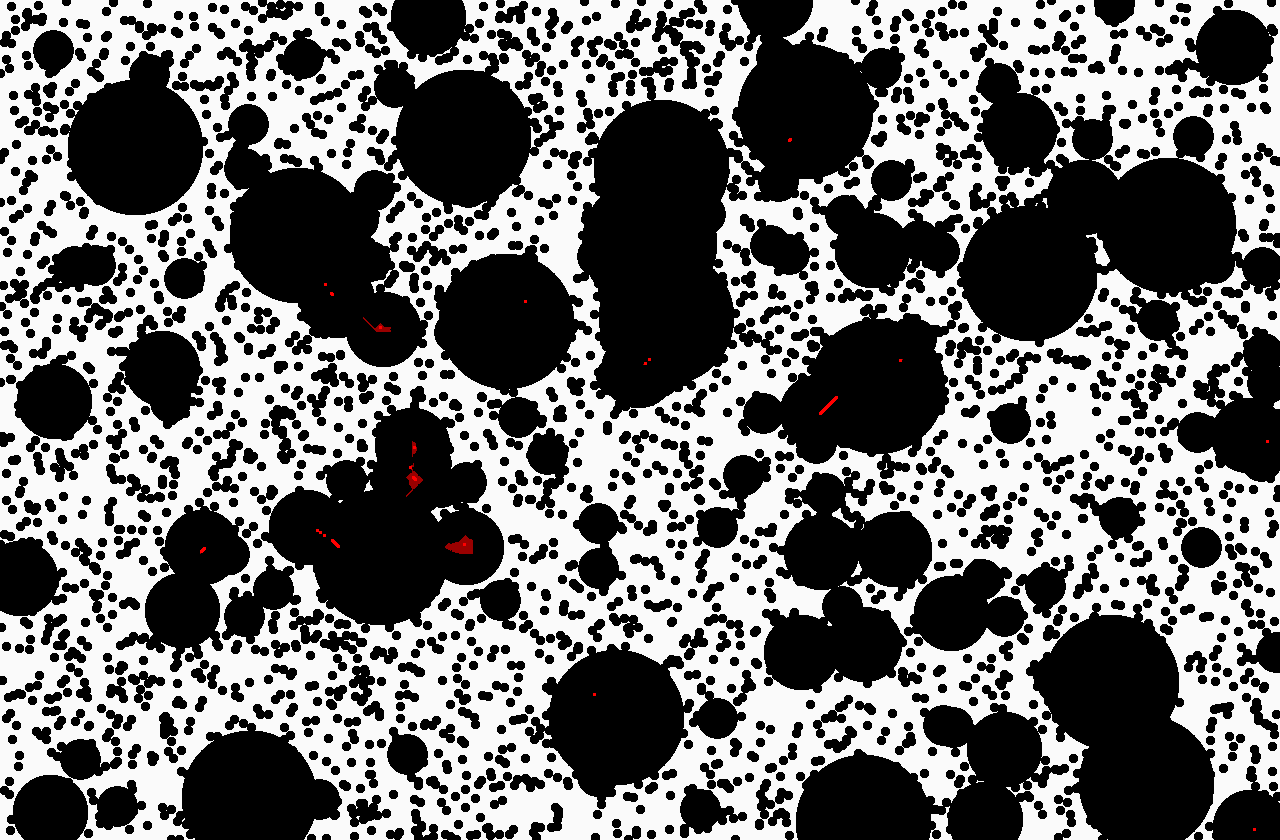

In [35]:
display(Image('./reverse.png'))